In [18]:
import serial
import re
import time

ser = serial.Serial('COM6', 115200, timeout=1)
aa = open('D:\桌面\datas_serial.txt', 'w', encoding='utf-8')
ser.write("testing".encode())
try:
    while 1:

        wind = ser.readline()   # 读取
        print(wind)
        st = str(wind)  # 列表转换字符串

        sst = re.findall(r'\d+\.?\d+', st)   # 字符串提取数字

        if sst == []:
            sst = 0
        else:
            print(str(sst[0]), str(sst[1]) )

            aa.write(str(sst[0])+ " " +sst[1] +'\n')


except KeyboardInterrupt:
    ser.close()
    aa.close()

b''
b''
b'0.35,0.07\r\n'
0.35 0.07
b'0.35,0.15\r\n'
0.35 0.15
b'0.70,0.33\r\n'
0.70 0.33
b'1.05,0.57\r\n'
1.05 0.57
b'1.41,0.86\r\n'
1.41 0.86
b'1.76,1.17\r\n'
1.76 1.17
b'2.11,1.50\r\n'
2.11 1.50
b'2.46,1.83\r\n'
2.46 1.83
b'2.81,2.18\r\n'
2.81 2.18
b'3.16,2.52\r\n'
3.16 2.52
b'3.52,2.87\r\n'
3.52 2.87
b'3.87,3.22\r\n'
3.87 3.22
b'4.22,3.57\r\n'
4.22 3.57
b'4.57,3.92\r\n'
4.57 3.92
b'4.92,4.27\r\n'
4.92 4.27
b'5.27,4.62\r\n'
5.27 4.62
b'5.63,4.97\r\n'
5.63 4.97
b'5.98,5.32\r\n'
5.98 5.32
b'6.33,5.67\r\n'
6.33 5.67
b'6.68,6.02\r\n'
6.68 6.02
b'7.03,6.38\r\n'
7.03 6.38
b'7.73,6.85\r\n'
7.73 6.85
b'7.73,7.16\r\n'
7.73 7.16
b'8.09,7.48\r\n'
8.09 7.48
b'8.79,7.94\r\n'
8.79 7.94
b'8.79,8.24\r\n'
8.79 8.24
b'9.14,8.55\r\n'
9.14 8.55
b'9.49,8.88\r\n'
9.49 8.88
b'9.84,9.22\r\n'
9.84 9.22
b'10.20,9.56\r\n'
10.20 9.56
b'10.55,9.90\r\n'
10.55 9.90
b'10.90,10.25\r\n'
10.90 10.25
b'11.25,10.60\r\n'
11.25 10.60
b'11.60,10.95\r\n'
11.60 10.95
b'11.95,11.30\r\n'
11.95 11.30
b'12.30,11.65\r\n'
12.30 11

调试4次Q R 参数，得出QR对滤波效果影响的结论

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_the_curve(file_name, the_dpi, the_size):
     data = np.genfromtxt(file_name)
     the_len, the_num = data.shape
     t = range(the_len)
     plt.figure(dpi= the_dpi, figsize= the_size)
     for angle_id in range(the_num):
          id_string = "encoder_" + str(angle_id)
          plt.plot(t, data[:,angle_id], linewidth = 0.5, label = id_string)
     plt.legend()

def plot_the_curve_without0(file_name, the_dpi, the_size):
     data = np.genfromtxt(file_name)
     the_len, the_num = data.shape
     t = range(the_len)
     plt.figure(dpi= the_dpi, figsize= the_size)
     for angle_id in range(the_num):
          if(angle_id == 0):
               continue
          id_string = "encoder_" + str(angle_id)
          plt.plot(t, data[:,angle_id], linewidth = 0.5, label = id_string)
     plt.legend()


In [6]:
print(5e3)

5000.0


In [2]:

file_test = '/Users/lilinlin/Desktop/毕设/datas_serial_Q=0.1.txt'
plot_the_curve(file_test, 100, (6,6))

NameError: name 'plot_the_curve' is not defined

In [5]:
import numpy as np
p_joints = np.zeros(5)
print(p_joints)

[0. 0. 0. 0. 0.]


In [4]:
def openreadtxt(file_name):
    data = np.genfromtxt(file_name)
    return data
 

data_Q_003 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.03.txt')
print(data_Q_003[0:3, 0:2])


[[0.   0.  ]
 [0.35 0.02]
 [0.7  0.06]]


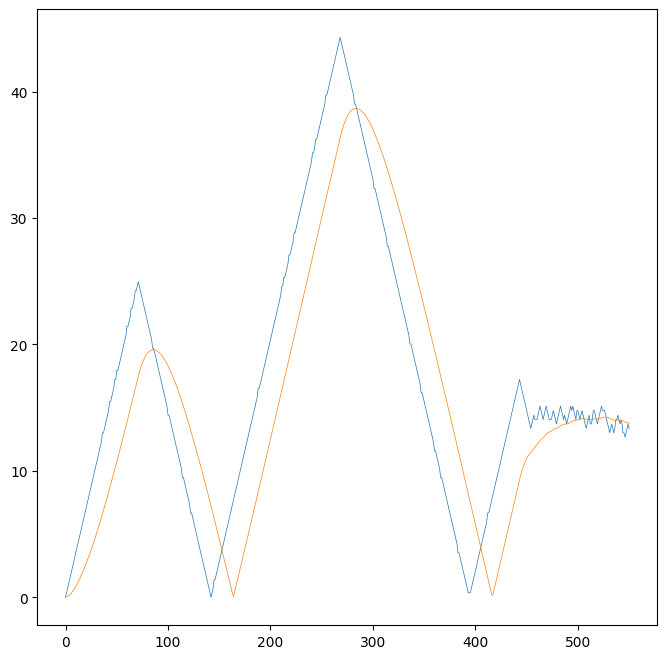

In [19]:
plot_the_curve('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.03.txt',100, (8,8))

Text(0.5, 1.0, 'Q = 0.03')

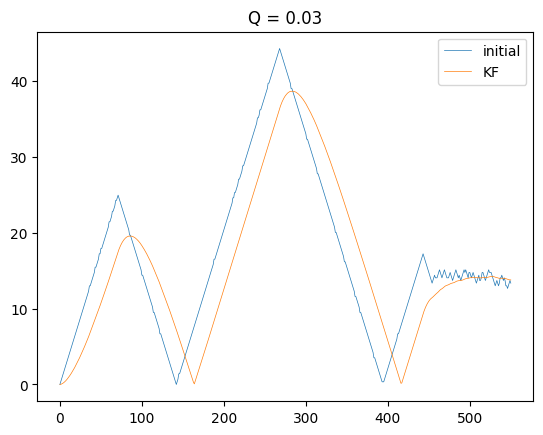

In [7]:
plt.figure(1)
len_1 = len(data_Q_003)
t1 = range(len_1)

data_Q_003_raw = data_Q_003[:,0]
data_Q_003_KF = data_Q_003[:,1]
plt.plot(t1, data_Q_003_raw, linewidth = 0.5,label = "initial" )
plt.plot(t1,data_Q_003_KF,linewidth = 0.5, label ="KF" )
plt.legend()
plt.title("Q = 0.03")

Q = 0.1 ; R= 16

In [8]:
data_Q_01 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.1.txt')

Text(0.5, 1.0, 'Q = 0.1')

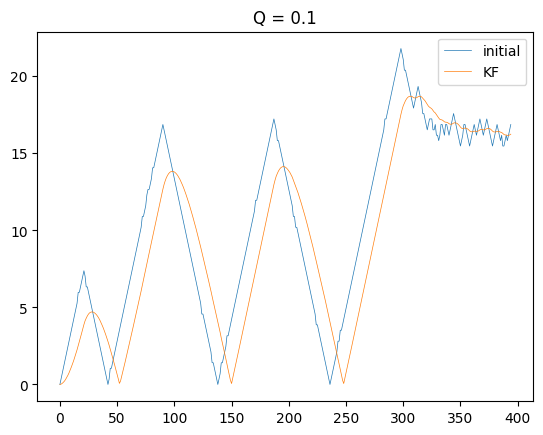

In [9]:
plt.figure(5)
len_5 = len(data_Q_01)
t5 = range(len_5)

data_Q_01_raw = data_Q_01[:,0]
data_Q_01_KF = data_Q_01[:,1]
plt.plot(t5, data_Q_01_raw, linewidth = 0.5,label = "initial" )
plt.plot(t5,data_Q_01_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.1")

Q = 0.3 ;R = 16

In [14]:
data_Q_03 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.3.txt')
# print(data_Q_03)

Text(0.5, 1.0, 'Q = 0.3')

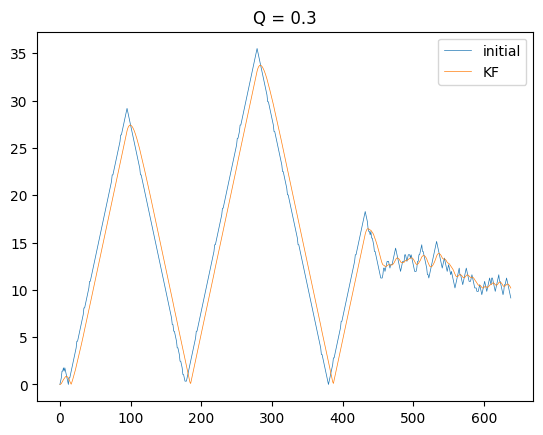

In [15]:
plt.figure(2)
len_2 = len(data_Q_03)
t2 = range(len_2)

data_Q_03_raw = data_Q_03[:,0]
data_Q_03_KF = data_Q_03[:,1]
plt.plot(t2, data_Q_03_raw,linewidth = 0.5,label = "initial")
plt.plot(t2,data_Q_03_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.3")

Q =3 ; R = 16

Text(0.5, 1.0, 'Q = 3')

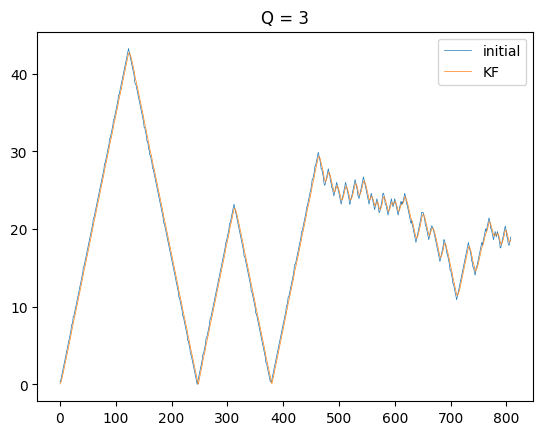

In [25]:
data_Q_3 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=3.txt')
# print(data_Q_3)
plt.figure(3)
len_3 = len(data_Q_3)
t3 = range(len_3)

data_Q_3_raw = data_Q_3[:,0]
data_Q_3_KF = data_Q_3[:,1]
plt.plot(t3, data_Q_3_raw,linewidth = 0.5,label = "initial")
plt.plot(t3,data_Q_3_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 3")

Q = 10; R = 16

Text(0.5, 1.0, 'Q = 10')

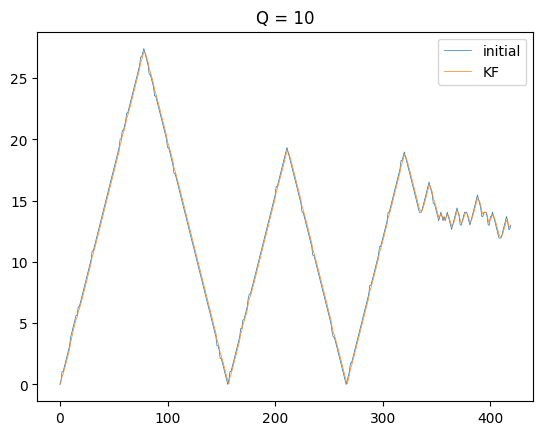

In [26]:
data_Q_10 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=10.txt')
# print(data_Q_10)
plt.figure(4)
len_4 = len(data_Q_10)
t4 = range(len_4)

data_Q_10_raw = data_Q_10[:,0]
data_Q_10_KF = data_Q_10[:,1]
plt.plot(t4, data_Q_10_raw,linewidth = 0.5,label = "initial")
plt.plot(t4,data_Q_10_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 10")

Text(0.5, 1.0, 'Q = 10')

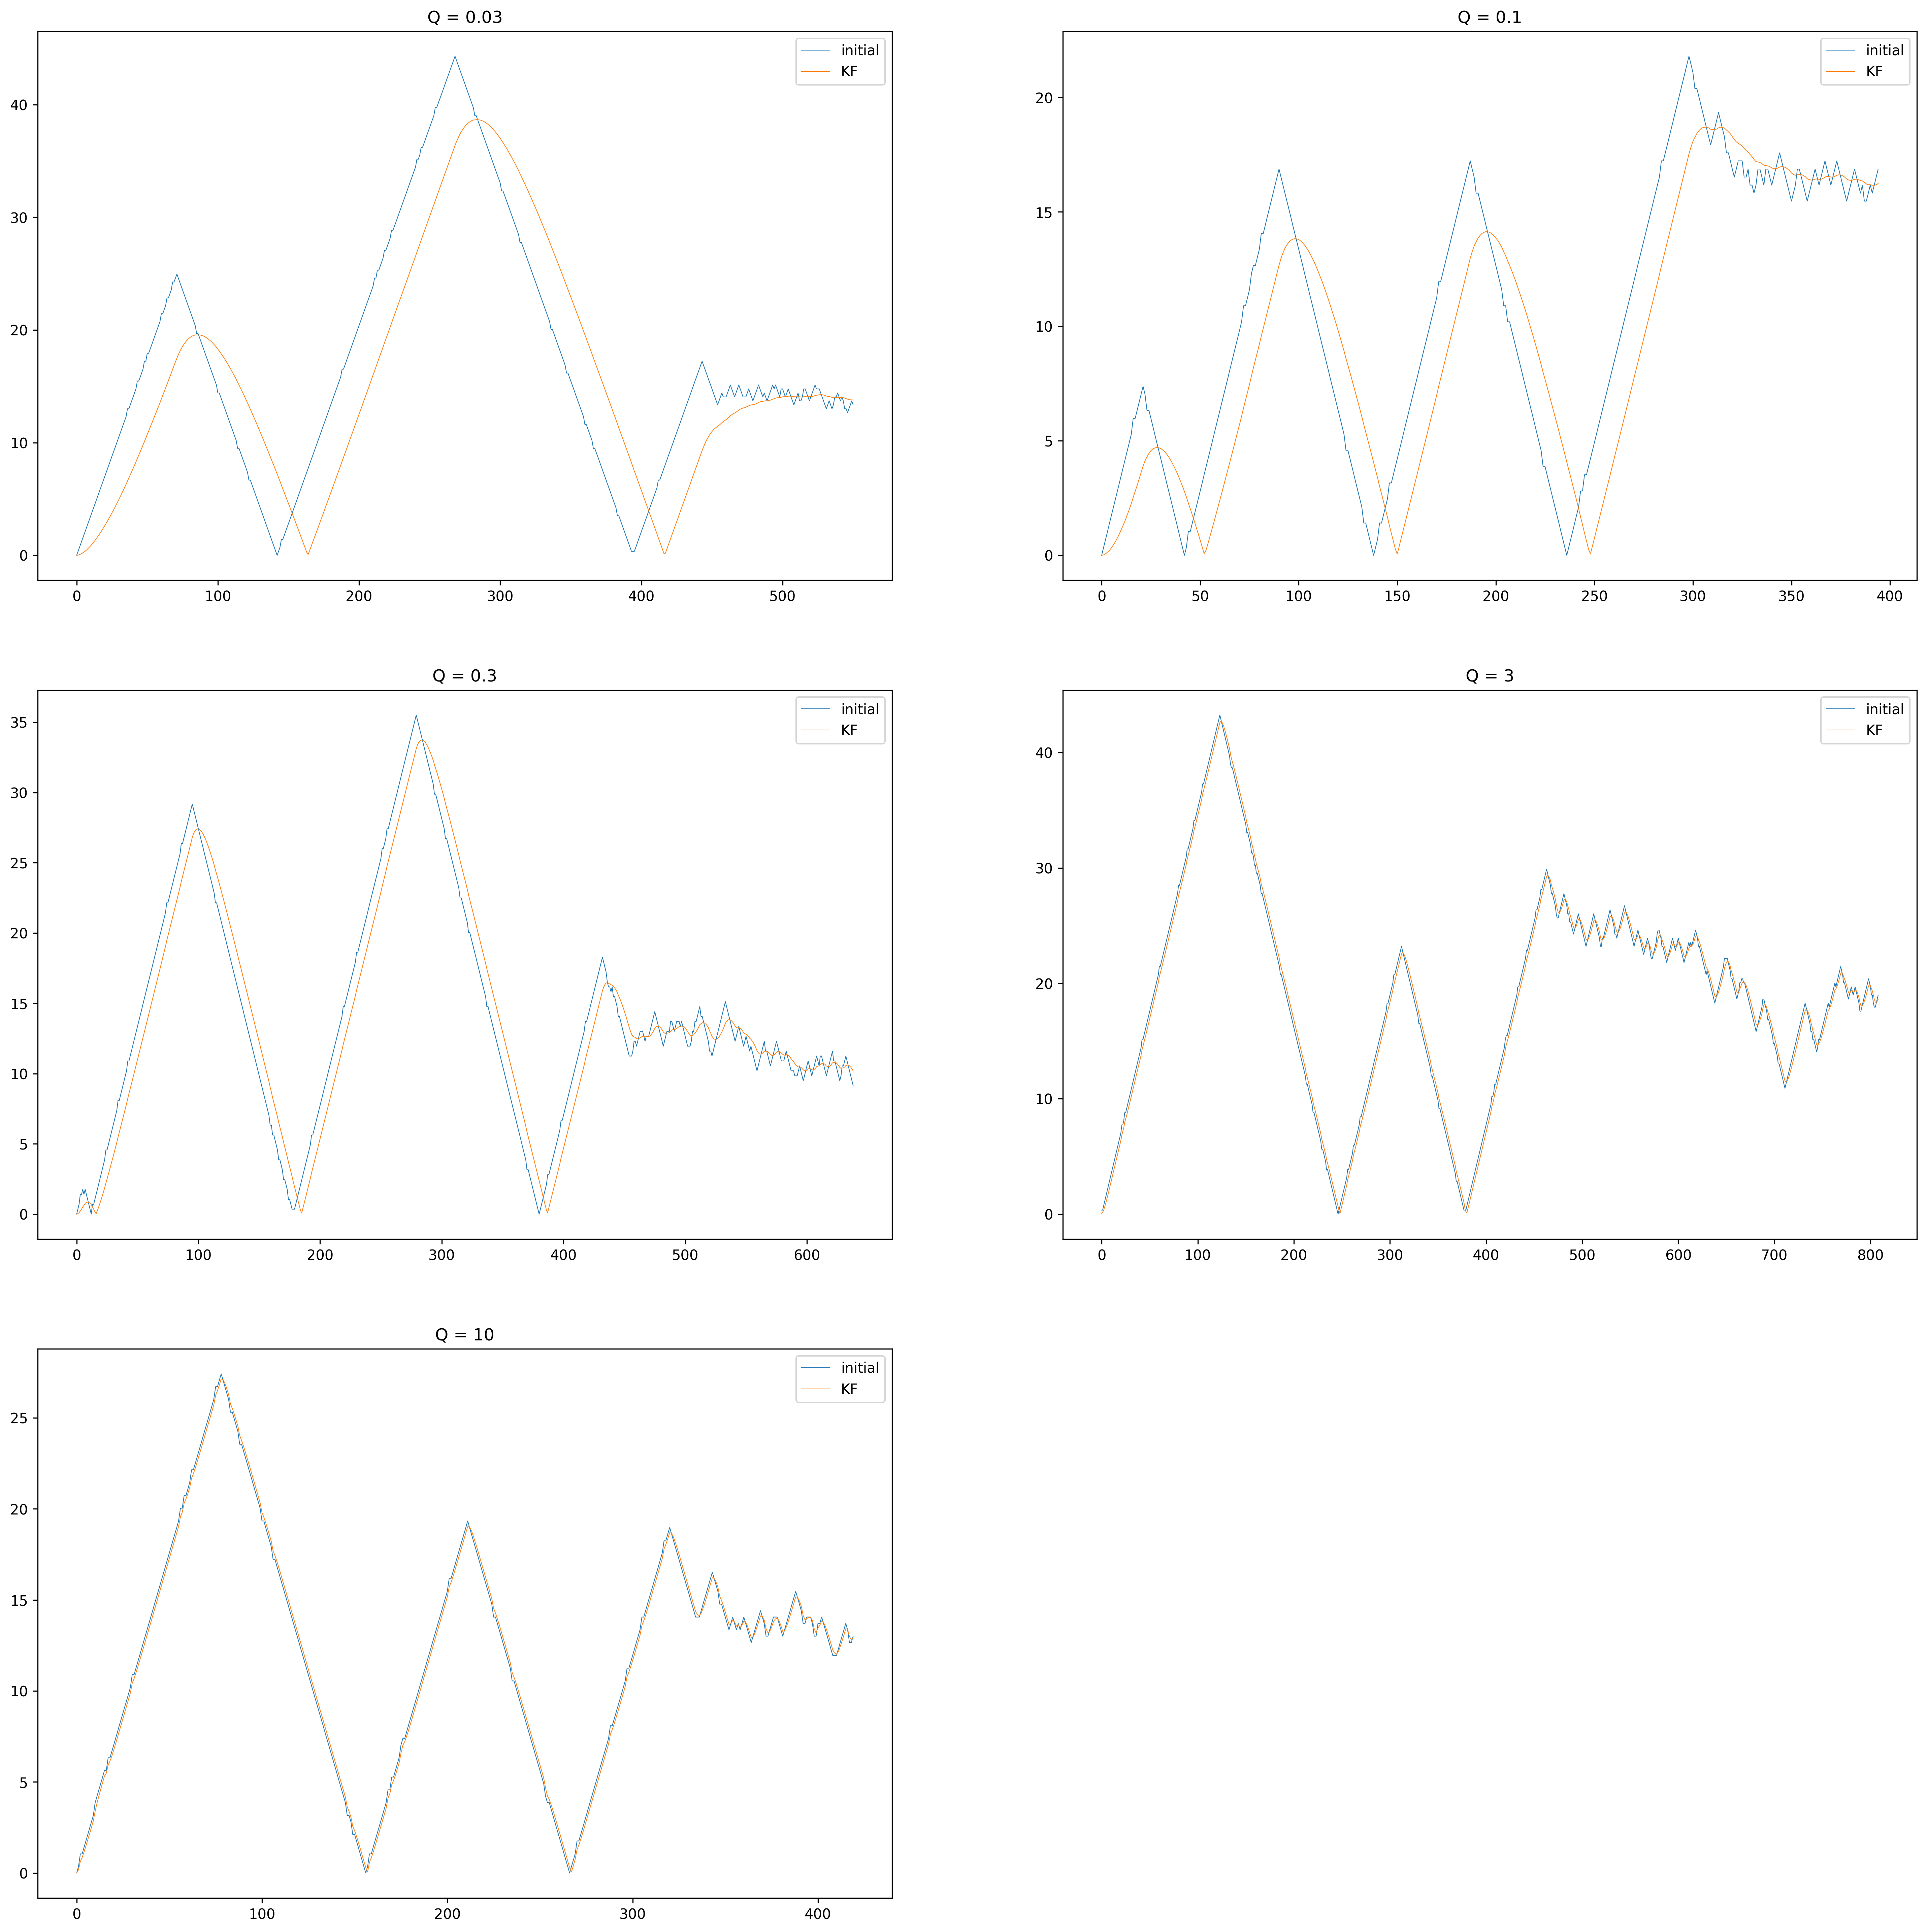

In [27]:
plt.figure(dpi=300, figsize=(24,24))
plt.subplot(321)
plt.plot(t1, data_Q_003_raw, linewidth = 0.5,label = "initial" )
plt.plot(t1,data_Q_003_KF,linewidth = 0.5, label ="KF" )
plt.legend()
plt.title("Q = 0.03")

plt.subplot(322)
plt.plot(t5, data_Q_01_raw, linewidth = 0.5,label = "initial" )
plt.plot(t5,data_Q_01_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.1")

plt.subplot(323)
plt.plot(t2, data_Q_03_raw,linewidth = 0.5,label = "initial")
plt.plot(t2,data_Q_03_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.3")

plt.subplot(324)
plt.plot(t3, data_Q_3_raw,linewidth = 0.5,label = "initial")
plt.plot(t3,data_Q_3_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 3")

plt.subplot(325)
plt.plot(t4, data_Q_10_raw,linewidth = 0.5,label = "initial")
plt.plot(t4,data_Q_10_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 10")

 从上述结果可以看出，R一定时，Q越小滤波结果越相信预测结果，也就是和实际相差越大，起到了一定的抗干扰滤波作用；当Q大到一定程度时效果极具下降；
具体将卡尔曼滤波调参可也看这篇文章[kft调参](https://zhuanlan.zhihu.com/p/37750839)
"Q值为过程噪声，越小系统越容易收敛，我们对模型预测的值信任度越高；但是太小则容易发散，如果Q为零，那么我们只相信预测值；Q值越大我们对于预测的信任度就越低，而对测量值的信任度就变高；如果Q值无穷大，那么我们只信任测量值；R值为测量噪声，太小太大都不一定合适。R太大，卡尔曼滤波响应会变慢，因为它对新测量的值的信任度降低；越小系统收敛越快，但过小则容易出现震荡；测试时可以保持陀螺仪不动，记录一段时间内陀螺仪的输出数据，这个数据近似正态分布，按3σ原则，取正态分布的(3σ)^2作为R的初始化值。测试时可以先将Q从小往大调整，将R从大往小调整；先固定一个值去调整另外一个值，看收敛速度与波形输出。"

经过第二次机械结构迭代，结构稍微稳定一点了，但是还是存在一些问题，暂时在这个基础上看一下测试的结果
encoder_0 手指roll关节
encoder_1 前后伸缩关节
encoder_2 小臂偏转关节
encoder_3 pitch关节
encoder_4 yaw关节

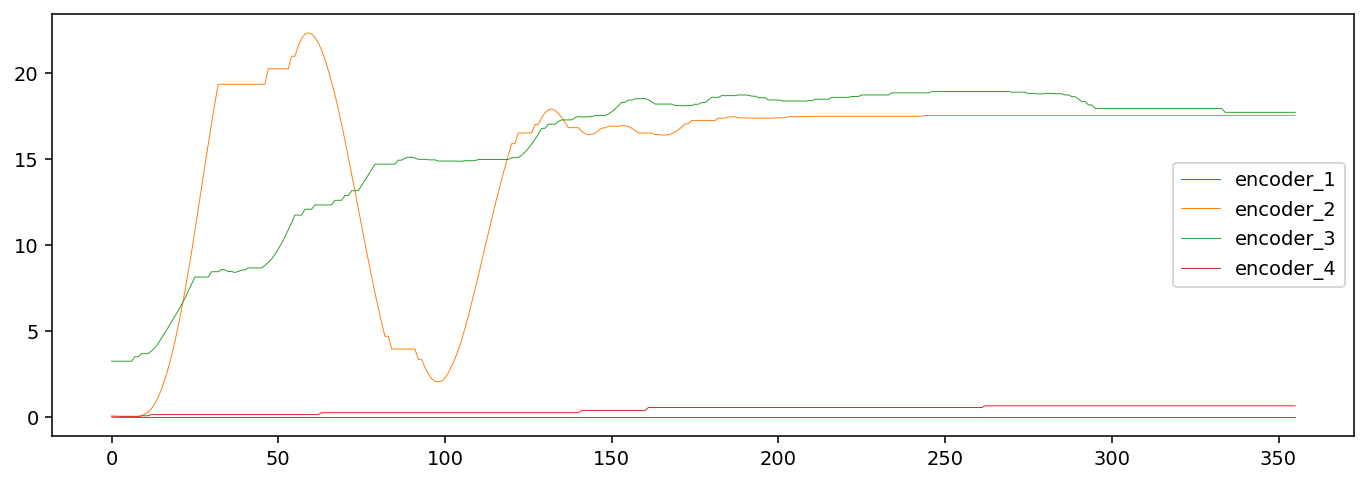

In [5]:
file_smallArm_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/小臂定位-1.txt'
plot_the_curve_without0(file_smallArm_1, 140,(12,4))



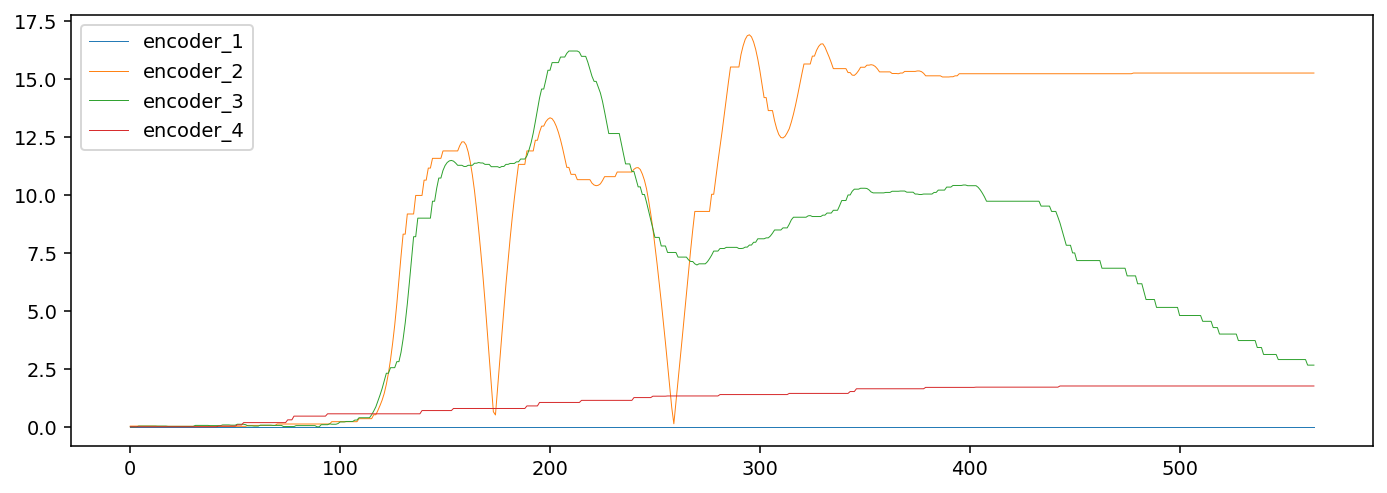

In [6]:
file_smallArm_2 = 'D:\\桌面\\毕业设计\\diploma_project\\simu\\data_analyze\\小臂定位-2.txt'
data_smallArm = openreadtxt(file_smallArm_2)

plot_the_curve_without0(file_smallArm_2, 140,(12,4))

理论上，这一部分只有小臂偏转关节会有明显的变化，但是为什么二连杆对应两个编码器数据跳的这么厉害？？？
而且为什么 编码器2 是明显的方波？

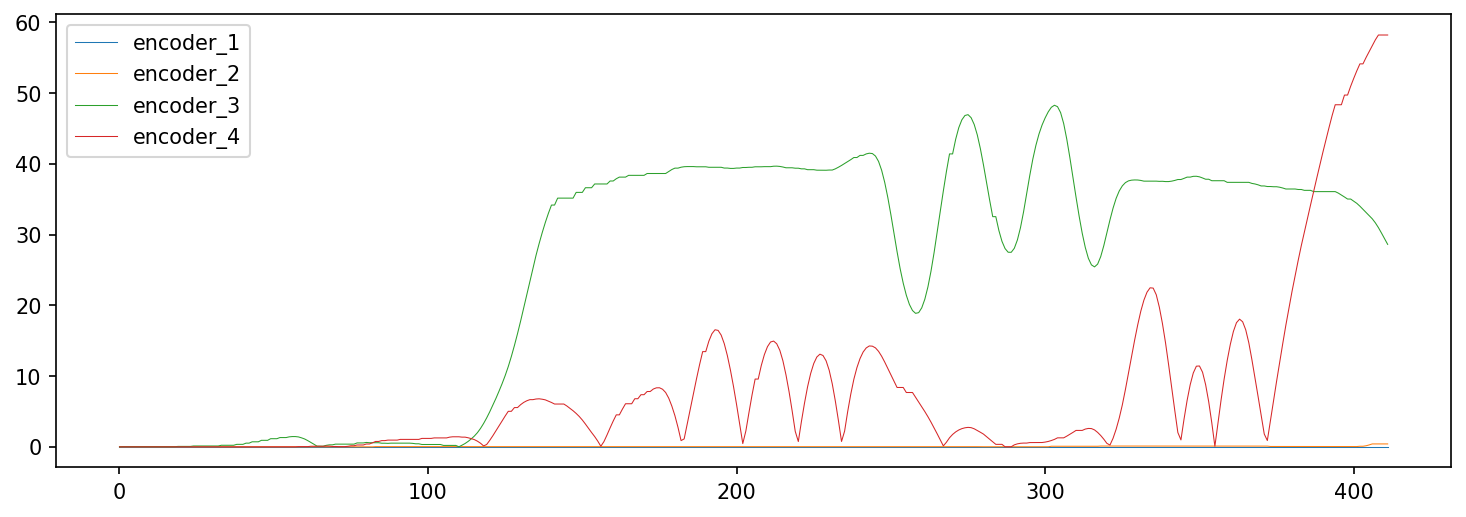

In [12]:
file_cutting_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/上下左右切割-1.txt'
plot_the_curve_without0(file_cutting_1, 150, (12,4))

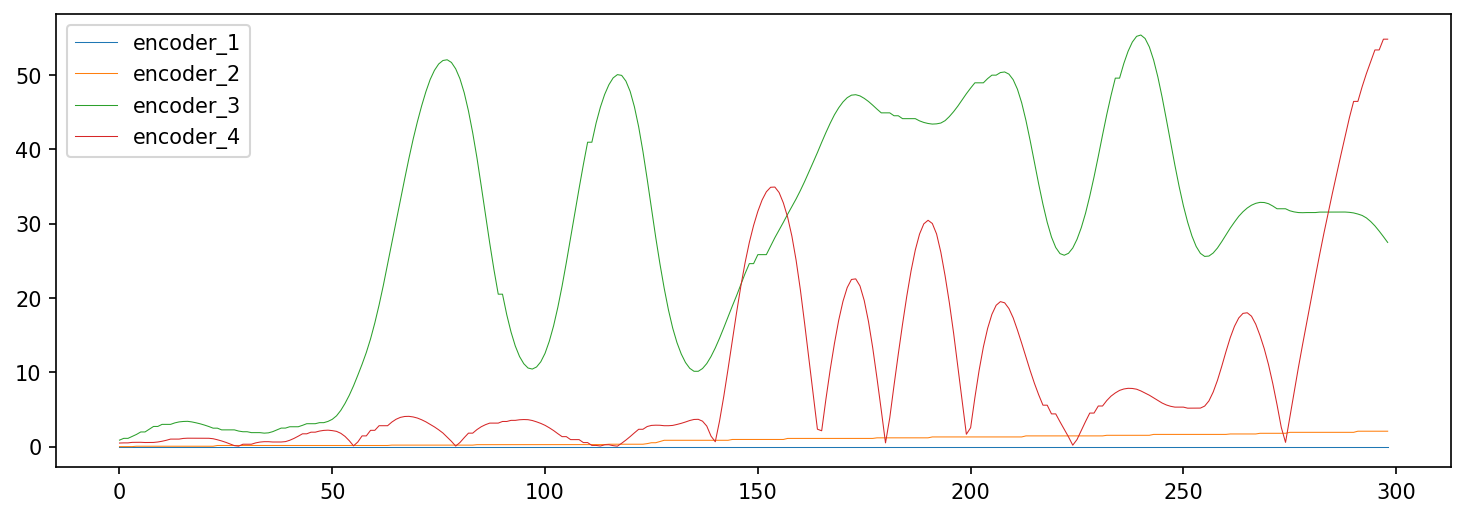

In [13]:
file_cutting_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/上下左右切割-2.txt'
plot_the_curve_without0(file_cutting_2, 150, (12,4))

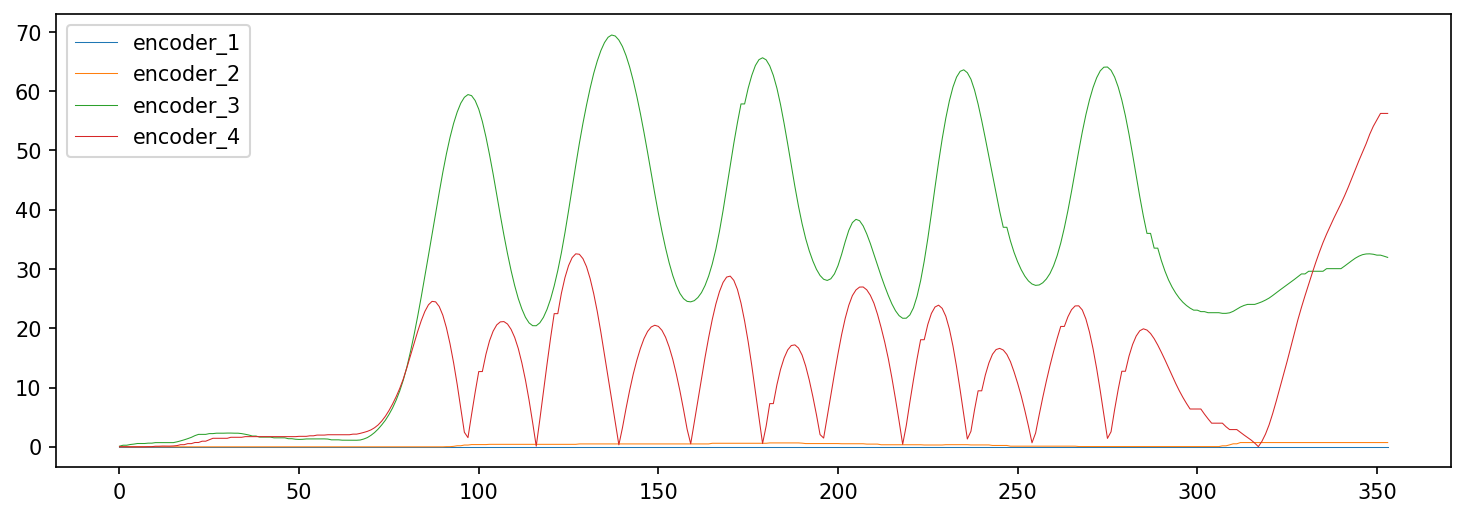

In [14]:
file_circling_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/转圈圈-1.txt'
plot_the_curve_without0(file_circling_1, 150, (12,4))

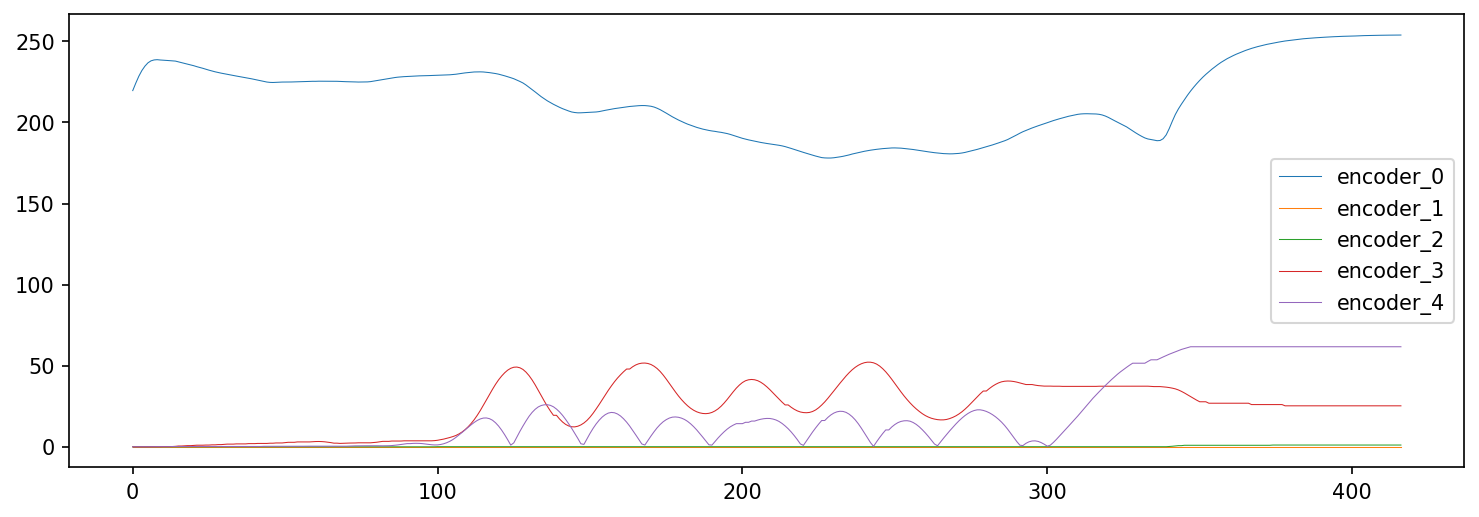

In [17]:
file_circling_2 = file_circling_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/转圈圈-2.txt'
plot_the_curve(file_circling_2, 150, (12,4))

二连杆对应的两个编码器基本上是重合的，这尼玛是巧合？？？

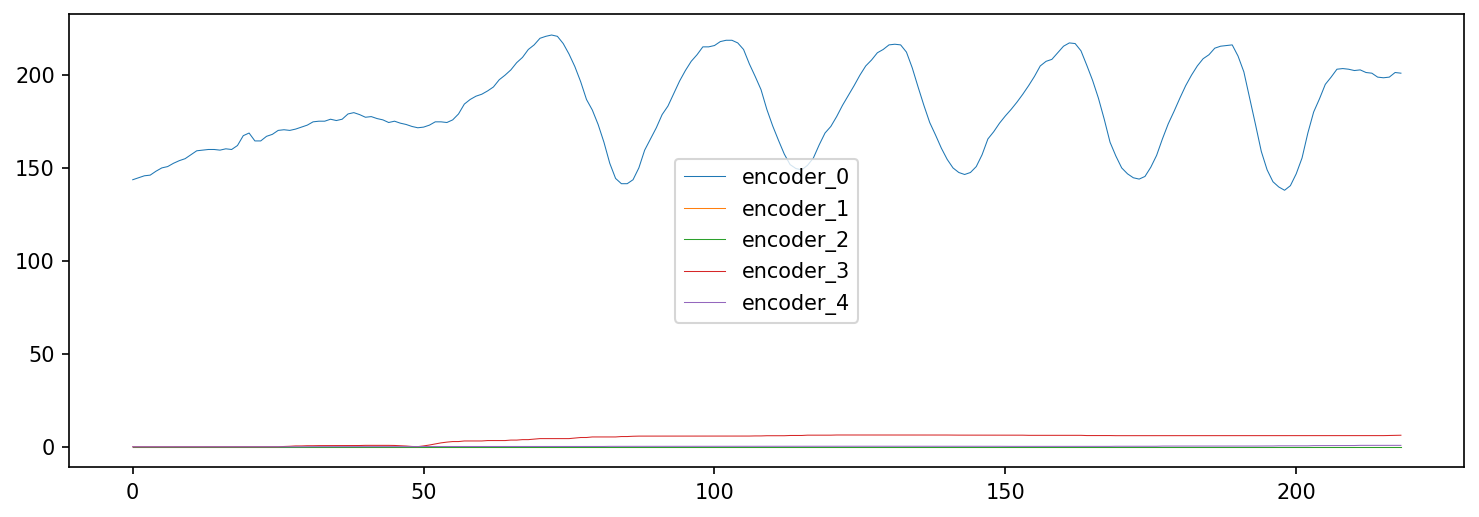

In [18]:
file_rolling = '/Users/lilinlin/Desktop/毕设/data_analyze/钻孔-2.txt'
plot_the_curve(file_rolling, 150, (12,4))

经过测试，发现存在以下问题：
1. pitch编码器的变化会直接同步到yaw编码器上？？？ 这是什么情况，目前推测是接线的问题，重新检查一遍接线；

以上问题在3.30得到解决，出现该bug的原因是多个编码器复用一个卡尔曼滤波器
现在的问题是，我好像也没看到什么明显的抖动，现在来分析一下医生手术时手会抖吗

不加卡尔曼时观察保持手部静止的波形图-1

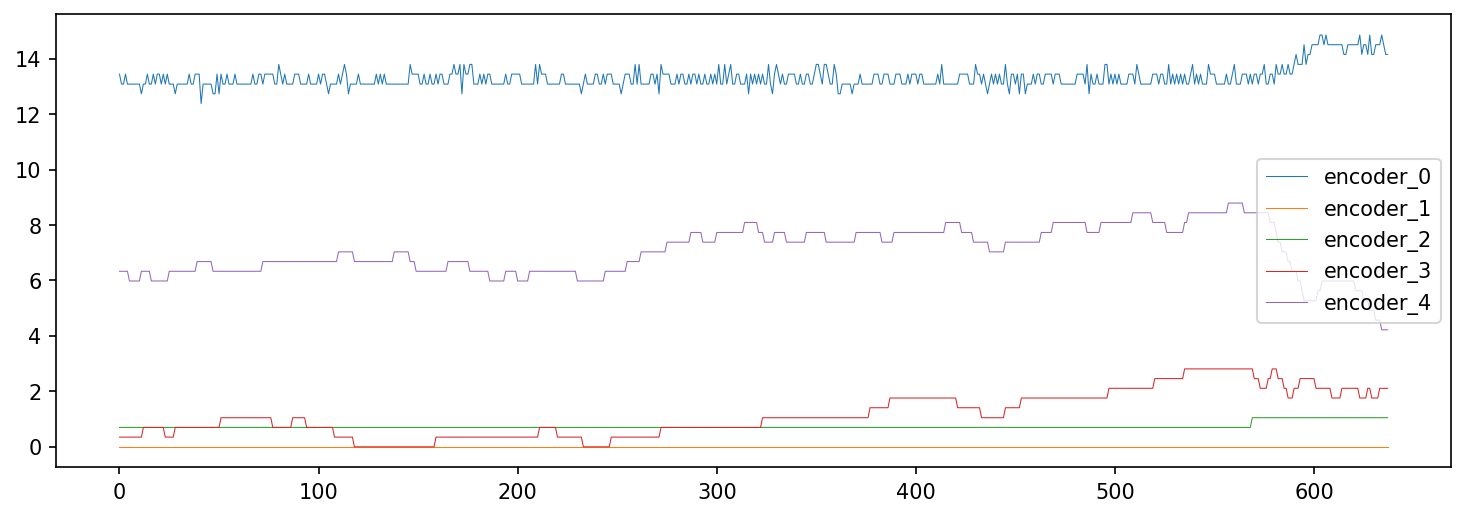

In [24]:
file_shaking_noKF = '/Users/lilinlin/Desktop/毕设/data_analyze/没有卡尔曼滤波的抖动.txt'
plot_the_curve(file_shaking_noKF, 150, (12,4))

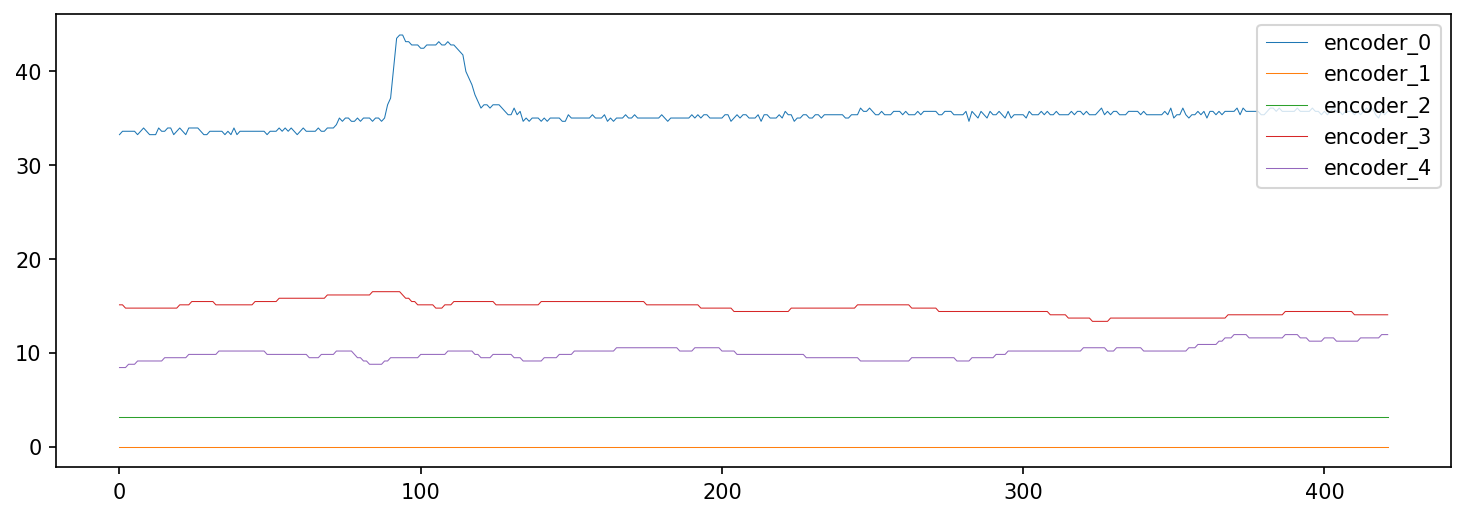

In [25]:
file_shaking_noKF_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/没有卡尔曼的抖动.txt'
plot_the_curve(file_shaking_noKF_2, 150, (12,4))

以下为添加卡尔曼滤波后抖动波形图

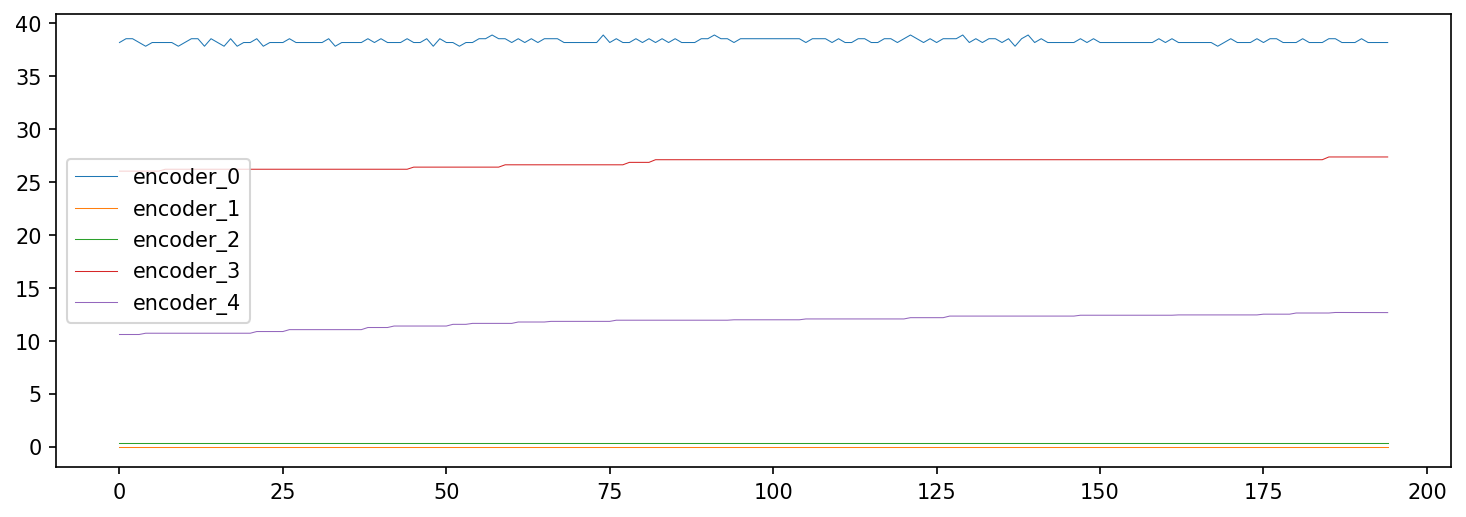

In [21]:
file_shaking_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/不自主抖动.txt'
plot_the_curve(file_shaking_1, 150, (12,4))

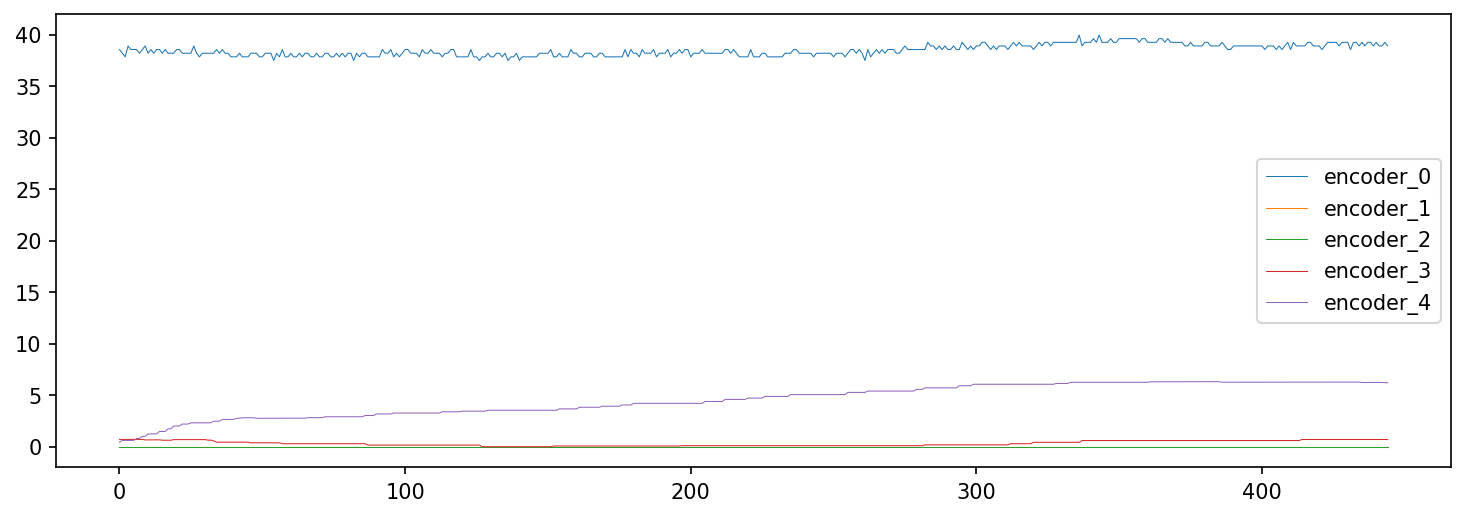

In [23]:
file_shaking_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/不自主抖动-2.txt'
plot_the_curve(file_shaking_2, 150, (12,4))